# The Bootstrap Approximation of Sampling Distributions

## Introduction

The Bootstrap is a common, computationally intensive procedure used to approximate the sampling distribution of any sample statistic (which is probably a point estimate of some unknown population parameter). Its power is derived from its generality: it applies to almost all sample statistics we may care about, while other methods (based primarily on the central limit theorem) only apply to the sample mean.

## Basic
### Part 1: What is Bootstrapping and Why Do We Use It?

The general concept of bootstrapping is to create many samples from the one sample you actually have collected.

Hypothetically, since the sample we have actually collected is our best available approximation to the population we are studying, randomly redrawing new samples out of the original sample itself (with replacement) can simulate random samples from the original population.  In the bootstrap the statistic of interest is computed on each re-sample in order to provide an empirical approximation of the sampling distribution of that statistic. 

<br>

Implement a `bootstrap` function to randomly draw with replacement from a given sample. The function should take a sample as a `numpy ndarray` and the number of resamples as an integer  (`default: 10000`). The function should return a list of `numpy ndarray` objects, each ndarray is one bootstrap sample. 

   ```python
   def bootstrap(x, resamples=10000):
       """Draw bootstrap resamples from the array x.

       Parameters
       ----------
       x: np.array, shape (n, )
         The data to draw the bootstrap samples from.
       
       resamples: int
         The number of bootstrap samples to draw from x.
       
       Returns
       -------
       bootstrap_samples: np.array, shape (resamples, n)
         The bootsrap resamples from x.
       """
   ```
   
   **Hint:**
   - Use `np.random.randint` to randomly draw the row indexes with replacement and then create the bootstrap sample by indexing the original sample with the randomly drawn row indexes
   - Or `np.random.choice` to randomly draw elements directly
 
<br>

In [71]:
import numpy as np
import matplotlib.pyplot as plt

test = [1, 1, 1, 2, 2, 3, 4, 4, 5, 6]
#print(bootstrap(test, resam))

print(np.random.choice(test, size=len(test), replace=True))

[1 4 5 5 1 4 5 4 1 1]


In [3]:
import numpy as np
def bootstrap(x, resamples=10000):
    """Draw bootstrap resamples from the array x.

   Parameters
   ----------
   x: np.array, shape (n, )
     The data to draw the bootstrap samples from.

   resamples: int
     The number of bootstrap samples to draw from x.

   Returns
   -------
   bootstrap_samples: np.array, shape (resamples, n)
     The bootsrap resamples from x.
   """
    empty = []
    for i in range(resamples):
        bootstrap_sample = np.random.choice(x, size=len(x), replace=True)
        empty.append(bootstrap_sample)
    return np.array(empty)

In [75]:
bstrap_array = bootstrap(test, 10000)
print(bstrap_array)

### Part 2: Bootstrap to find Confidence Interval of Mean

The bootstrap can be used to provide very simple confidence intervals for a population parameter.  The empirical quantiles of the bootstrapped sampling distribution can be used as confidence intervals, usuall called bootstrapped confidence intervals.

So for example, if, upon bootsrapping, you get

   ```python
   [1, 1, 1, 2, 2, 3, 4, 4, 5, 6]
   ```

as the bootstraped values of some sample statistic, then the interval `[1, 5]` would be a 80% confidence interval (where the 1 and the 5 are the 10th and 90th percentile of the array of boostrapped values).

Company X wants to find out if changing to Apple monitors increases its programmers' productivity. A random sample of 25 people is chosen and their monitors are switched. The difference between their productivity before and after the monitor switch is recorded in `data/productivity.txt`.
 
<br>

1. Load the data `data/productivity.txt`.

2. Why is it inappropriate to only report the mean difference in productivity as evidence to support the decision of changing all the monitors to Apple monitors in the company?

3. Implement a `bootstrap_ci` function to calculate the confidence interval of any sample statistic (in this case the `mean`). The function should take a sample, a function that computes the sample statistic, the number of resamples (`default: 10000`), and the confidence level (`default: 0.95`). The function should return the lower and upper bounds of the confidence interval and the bootstrap distribution of the test statistic.
   
   You should be able to call the function in the following manner:
   
   ```python
   bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=95)
   ```

   **Hint:**
   - `bootstrap_ci` should call your `bootstrap` function to create the bootstrap samples.
   - Apply (map) the test statistic function to the bootstrap samples.
   - Use the **percentile interval method**: e.g., take the empirical 2.5% percentile and 97.5% percentile of the bootstrapped sampling distribution to create a 95% bootstrapped confidence interval.

4. Plot the bootstrap distribution of the means in a histogram. 

5. Based on the bootstrap confidence interval, what conclusions can you draw? What about if a 90% confidence interval were used instead? 
   
   Suppose there are 100 programmers in the company. The cost of changing a monitor is $500 and the increase of one unit of productivity is worth $2,000, would you recommend switching the monitors? State the assumptions you are making and show your work.
  
<br>

In [5]:
import pandas as pd

prod_ = pd.read_csv("/Users/zschulzb/OneDrive/_mydev/galvanize/assignments/sampling-distributions/data/productivity.txt")
prod_.head()

# bootstrap_sample_std = []
# for i in range(1000):
#     b = bootstrap(test)
#     bootstrap_std = np.std(b)
#     bootstrap_sample_std.append(bootstrap_std)

,-1.910000000000000142e+01
0,-15.2
1,-12.4
2,-15.4
3,-8.7
4,-6.7


2. Why is it inappropriate to only report the mean difference in productivity as evidence to support the decision of changing all the monitors to Apple monitors in the company?

Answer: the same range is wide (-16h, 28h) and sample size is small (25) within that distro.

Mean doesn't represent time well

In [64]:
time_series = np.array(prod_).reshape(len(prod_), 1)
type(time_series)
np.shape(time_series)
# list(time_series)
# print(prod_.iloc[:, :-1])
time_series = prod_.iloc[:, :-1]
type(time_series)

pandas.core.frame.DataFrame

In [67]:
time_series = np.array(prod_).flatten()
type(time_series)
np.shape(time_series)

(24,)

In [7]:
prod_.describe()

,-1.910000000000000142e+01
count,24.00000
mean,6.05000
std,13.02793
min,-15.40000
25%,-4.10000
50%,8.05000
75%,14.17500
max,27.70000


1.910000000000000142e+01
-1.519999999999999929e+01
-1.240000000000000036e+01
-1.539999999999999858e+01
-8.699999999999999289e+00
-6.699999999999999289e+00
-5.899999999999999467e+00
-3.500000000000000000e+00
-3.099999999999999645e+00
-2.099999999999999645e+00
4.200000000000001066e+00
6.099999999999999645e+00
7.000000000000001776e+00
9.099999999999999645e+00
1.000000000000000178e+01
1.029999999999999893e+01
1.320000000000000107e+01
1.009999999999999964e+01
1.409999999999999964e+01
1.440000000000000036e+01
2.010000000000000142e+01
2.629999999999999716e+01
2.769999999999999574e+01
2.219999999999999574e+01
2.339999999999999858e+01

3. Implement a `bootstrap_ci` function to calculate the confidence interval of any sample statistic (in this case the `mean`). The function should take a sample, a function that computes the sample statistic, the number of resamples (`default: 10000`), and the confidence level (`default: 0.95`). The function should return the lower and upper bounds of the confidence interval and the bootstrap distribution of the test statistic.
   
   You should be able to call the function in the following manner:
   
   ```python
   bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=95)
   ```

   **Hint:**
   - `bootstrap_ci` should call your `bootstrap` function to create the bootstrap samples.
   - Apply (map) the test statistic function to the bootstrap samples.
   - Use the **percentile interval method**: e.g., take the empirical 2.5% percentile and 97.5% percentile of the bootstrapped sampling distribution to create a 95% bootstrapped confidence interval.

In [88]:
def bootstrap_ci(x, stat_flag=np.mean, resamples=1000, ci=95): # string for placeholder
    """Draw bootstrap resamples from the array x.

   Parameters
   ----------
   x: np.array, shape (n, )
     The data to draw the bootstrap samples from.

   resamples: int
     The number of bootstrap samples to draw from x.

   Returns
   -------
   bootstrap_samples: np.array, shape (resamples, n)
     The bootsrap resamples from x.
   """
    #bootstrap_sample_std = []
#     for i in range(1000):
    b = bootstrap(x)
    b_lst = []
    for i in b:
        b_lst.append(stat_flag(i))
    stat_descrip = stat_flag(b)
    #bootstrap_sample_std.append(stat_descrip)
#     return bootstrap_sample_std
    endpoints = []
    left_endpoint = np.percentile(b, (100-ci)/2)
    right_endpoint = np.percentile(b, 100-((100-ci)/2))
    endpoints.append([left_endpoint, right_endpoint])

    return endpoints, stat_descrip, b_lst

def graph_bootstrap(x):
    fig, ax = plt.subplots(1, figsize = (25,10))
    hist_bstrap_means = ax.hist(x, bins=100, density=True, color='black', alpha=0.5)

In [89]:
ep, boot_s, b_lst = bootstrap_ci(time_series)

In [85]:
print(ep, boot_s)

[[-15.399999999999997, 27.699999999999992]] 6.043754999999998


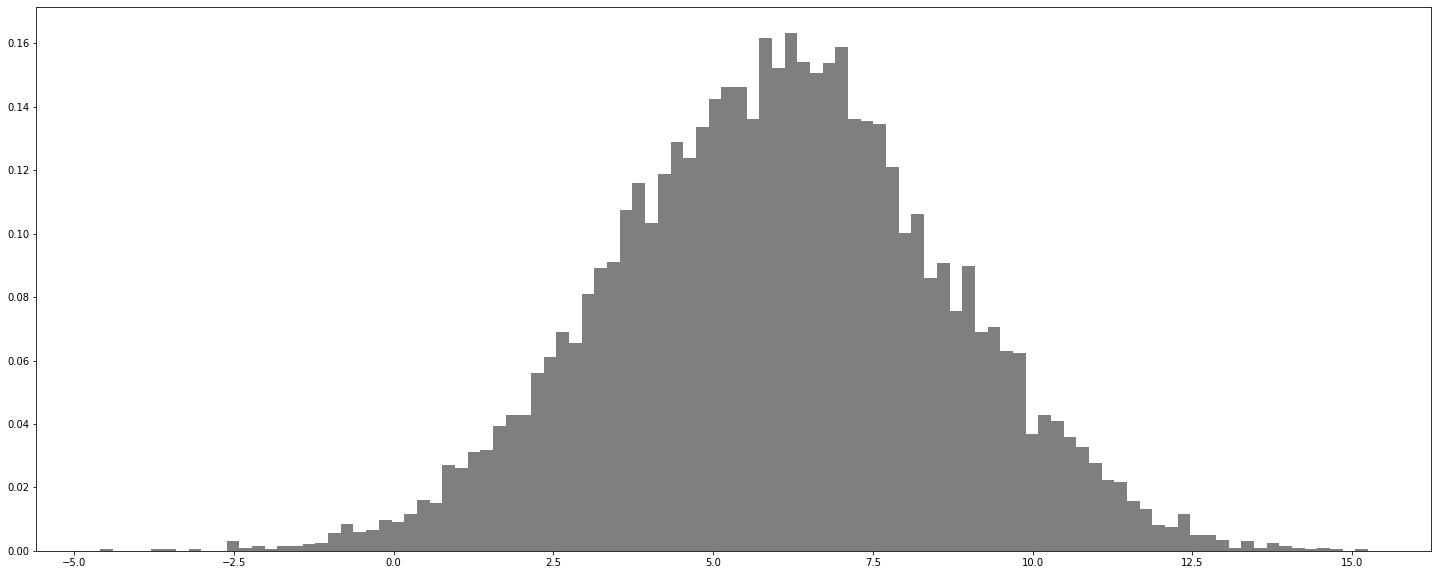

In [90]:
graph_bootstrap(b_lst)

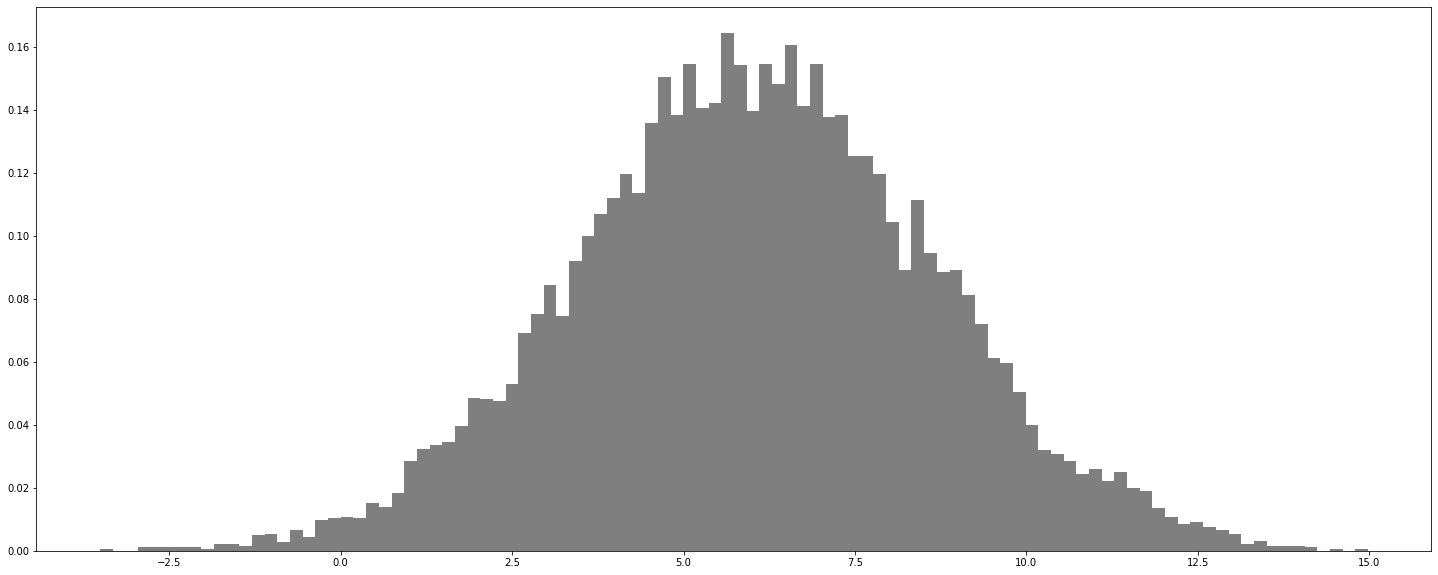

In [86]:
fig, ax = plt.subplots(1, figsize = (25,10))
# bars = ax.bar([left_endpoint, right_endpoint], b_lst, color = 'black', align = 'center')
hist_bstrap_means = ax.hist(b_lst, bins=100, density=True, color='black', alpha=0.5)

# _ = ax.hist(bootstrap_sample_std, bins=100, density=True, color="black", alpha=0.5)

this proves thru bootstrapping a sample's mean, the bootstapped sampling mean distrobuton will be normally distrobuted around the original sample's mean. 

5. Based on the bootstrap confidence interval, what conclusions can you draw? What about if a 90% confidence interval were used instead?

Suppose there are 100 programmers in the company. The cost of changing a monitor is  500 and the increase of one unit of productivity is worth 2,000, would you recommend switching the monitors? State the assumptions you are making and show your work.

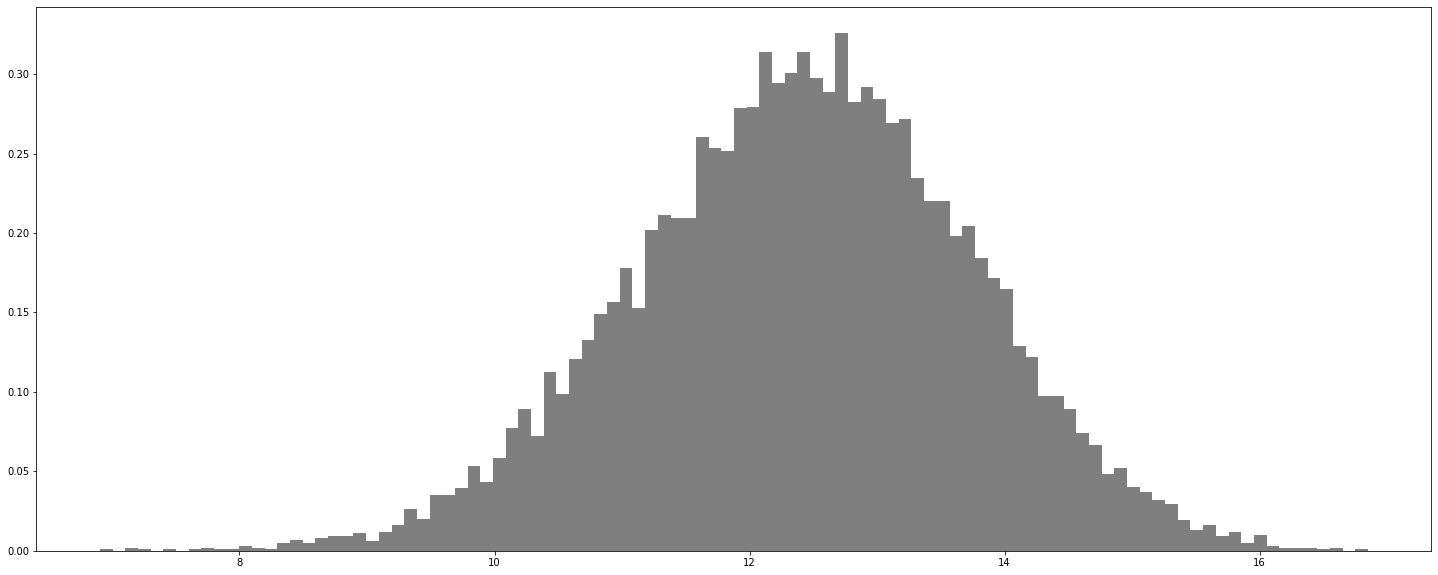

In [94]:
ep5, boot_s5, b_lst5 = bootstrap_ci(time_series, stat_flag=np.std, ci=90)
graph_bootstrap(b_lst5)

Answer: per employee a single monitor will cost \\$500. If, on average, productivity will increase 6 hours per employee then productivity will increase $12k per employee.  \\$12k > \\$500. Why not get each employee 5 monitors and ratain the \\$2k? Because every cool developer uses a Macbook; and macbook are limits to 4 4k m

## Advanced

### Part 3: Bootstrap to find Confidence Interval of Correlation

You are interested if there is a positive correlation between the LSAT admission exam score and the first year GPA achieved in law schools. You are given the mean LSAT and mean GPA scores for the students from a sample of 15 law schools.

<br>

1. Load the data `data/law_sample.txt`

2. Use `scipy.stats.pearsonr` to compute the correlation.
   
3. Use the `bootstrap_ci` function to compute the confidence interval for the correlation coefficient.  Based on the bootstrap confidence interval, what conclusions can you draw?

4. Plot the bootstrap distribution of the correlation in a histogram. 

5. Load in the LSAT and GPA data for all the law school (`data/law_all.txt`) and verify the population correlation is within the confidence interval.

Note: The percentile interval method (as implemented in `bootstrap_ci`) is less than optimal for building a confidence interval when the bootstrap distribution of the statistic is not nearly symmetrical. There are methods to correct for the confidence interval in such cases which will not be covered here. ([Studentized Bootstrap & Bias-Corrected Bootstrap](http://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29#Methods_for_bootstrap_confidence_intervals)) 
